# Numerical Analaysis
## Dataset : Heart Disease Prediction
## Link : https://www.kaggle.com/code/susirahman/heart-disease-prediction/input

## Details about the dataset

 ### Heart_Disease_Prediction.csv contains clinical and demographic features used to predict whether a patient has heart disease.

 ### Total 14 columns 
- Age -  Age of the patient (in years)
- Sex - Gender of the patient (1 = male, 0 = female)
- chest pain scale - Type of chest pain experienced by the patient
- BP -Fasting blood sugar > 120 mg/dl (1 = yes, 0 = no)
- cholestrol - Serum cholesterol level (mg/dl)
- FBS over 120 - Fasting blood sugar > 120 mg/dl (1 = yes, 0 = no)
- EKG results - Resting electrocardiogram results
- Max HR -  Maximum heart rate achieved during exercise
- Exercise angina -Exercise-induced angina (1 = yes, 0 = no)
- ST depression -  ST depression induced by exercise relative to rest
- Slope of ST - the Slope of the peak exercise ST segment (1-Upsloping, 2-Flat (Horizontal), 3- Downsloping) the lower the slope its better
- Number of vessels fluro- Number of Major Vessels (0-3) colored by flurosopy( the higher the number its risk)
- Thallium - Thallium Stress Test(3-Normal , 6-Fixed Defect , 7-Reversible Defect)
- Heart Disease - Presense of heart disease

In [101]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, RobustScaler,LabelEncoder

## Reading the dataset file and storing it in a dataframe


In [51]:
df = pd.read_csv("Data/Heart_Disease_Prediction.csv")

## Checking the columns 

In [6]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [66]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [18]:
df = df.rename(columns={'Chest pain type':'Chest pain scale'})

In [10]:
df.shape

(270, 14)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

### From the info function, We can see that the data has no missing values 

In [13]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [19]:
df.columns

Index(['Age', 'Sex', 'Chest pain scale', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [24]:
df['Heart Disease'].head()

0    Presence
1     Absence
2    Presence
3     Absence
4     Absence
Name: Heart Disease, dtype: object

In [29]:
df['Sex'].value_counts()

Sex
1    183
0     87
Name: count, dtype: int64

In [30]:
df.nunique()

Age                         41
Sex                          2
Chest pain scale             4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

## from checking the rows of the heart disease its more like a binary categorical,we can use target encoding to convert categorical to numerical format

In [56]:
le= LabelEncoder()
le.fit(df['Heart Disease'])
list(le.classes_) ##Absence=0, Presence=1

['Absence', 'Presence']

In [57]:
df['Heart Disease']=le.transform(df['Heart Disease'])

In [58]:
df['Heart Disease'].value_counts()

Heart Disease
0    150
1    120
Name: count, dtype: int64

## checking for duplicates 

In [65]:
df.loc[df.duplicated()] ## There is no duplicate values

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease


In [63]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


<Axes: ylabel='Age'>

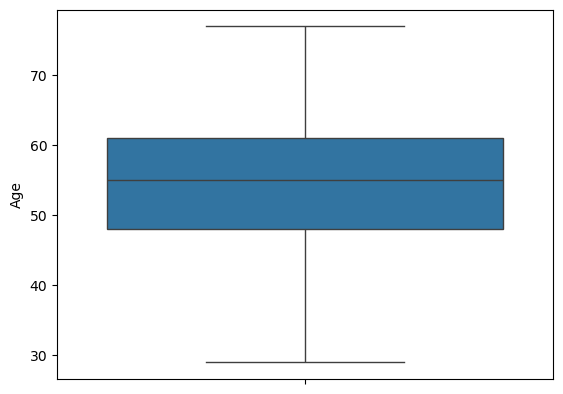

In [78]:
sns.boxplot(df.Age)

<Axes: ylabel='BP'>

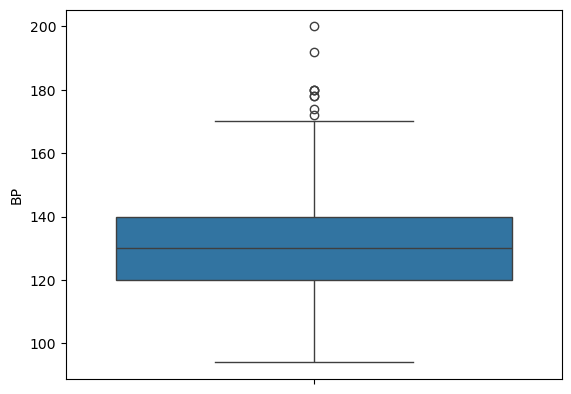

In [79]:
sns.boxplot(df['BP'])

In [83]:
df.query('BP>175')

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
87,59,1,1,178,270,0,2,145,0,4.2,3,0,7,0
110,55,0,4,180,327,0,1,117,1,3.4,2,0,3,1
117,56,0,4,200,288,1,2,133,1,4.0,3,2,7,1
144,54,1,2,192,283,0,2,195,0,0.0,1,1,7,1
159,66,0,4,178,228,1,0,165,1,1.0,2,2,7,1
165,64,0,4,180,325,0,0,154,1,0.0,1,0,3,0
240,68,1,3,180,274,1,2,150,1,1.6,2,0,7,1


<Axes: ylabel='Cholesterol'>

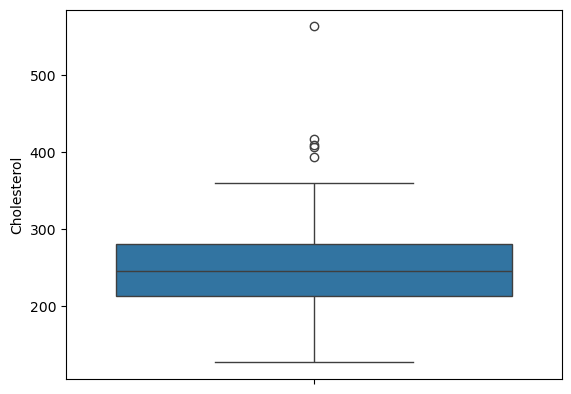

In [81]:
sns.boxplot(df['Cholesterol'])

<Axes: xlabel='Thallium', ylabel='count'>

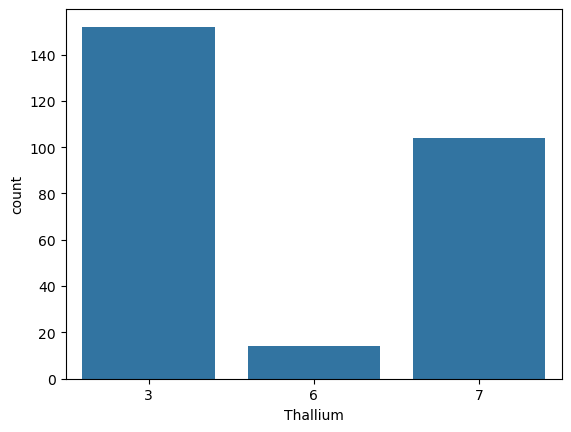

In [85]:
sns.countplot(x='Thallium', data=df)

<Axes: ylabel='ST depression'>

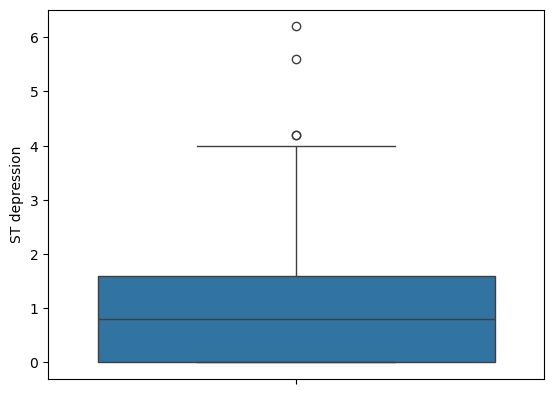

In [104]:
sns.boxplot(df['ST depression'])

<Axes: ylabel='Max HR'>

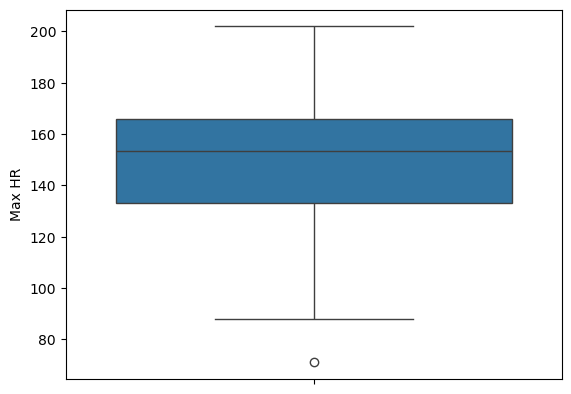

In [92]:
sns.boxplot(df['Max HR'])

## Performing Normalization for the columns Age using min, max method and using robust scalar for max hr, cholestorol, bp, and ST depression because of the outliers which we can't avoid)


In [98]:
scaler = MinMaxScaler()

In [100]:
df_normalized=df.copy()
df_normalized['Age']=scaler.fit_transform(df[['Age']])

In [102]:
rob=RobustScaler()

In [105]:
features=['Max HR','Cholesterol', 'BP','ST depression']
df_normalized[features]=rob.fit_transform(df[features])

In [106]:
df_normalized.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0.854167,1,4,0.00,1.149254,0,2,-1.348485,0,1.0000,2,3,3,1
1,0.791667,0,3,-0.75,4.761194,0,2,0.196970,0,0.5000,2,0,7,0
2,0.583333,1,2,-0.30,0.238806,0,0,-0.378788,0,-0.3125,1,0,7,1
3,0.729167,1,4,-0.10,0.268657,0,0,-1.469697,1,-0.3750,2,1,7,0
4,0.937500,0,2,-0.50,0.358209,0,2,-0.984848,1,-0.3750,1,1,3,0


## performing some scatterplot to find the relationship between each column

In [120]:
df_normalized['Cholesterol'].idxmax()


1

In [127]:
 df.head(2)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0


In [128]:
df.idxmax()

Age                        199
Sex                          0
Chest pain type              0
BP                         117
Cholesterol                  1
FBS over 120                 6
EKG results                  0
Max HR                     214
Exercise angina              3
ST depression              235
Slope of ST                 17
Number of vessels fluro      0
Thallium                     1
Heart Disease                0
dtype: int64

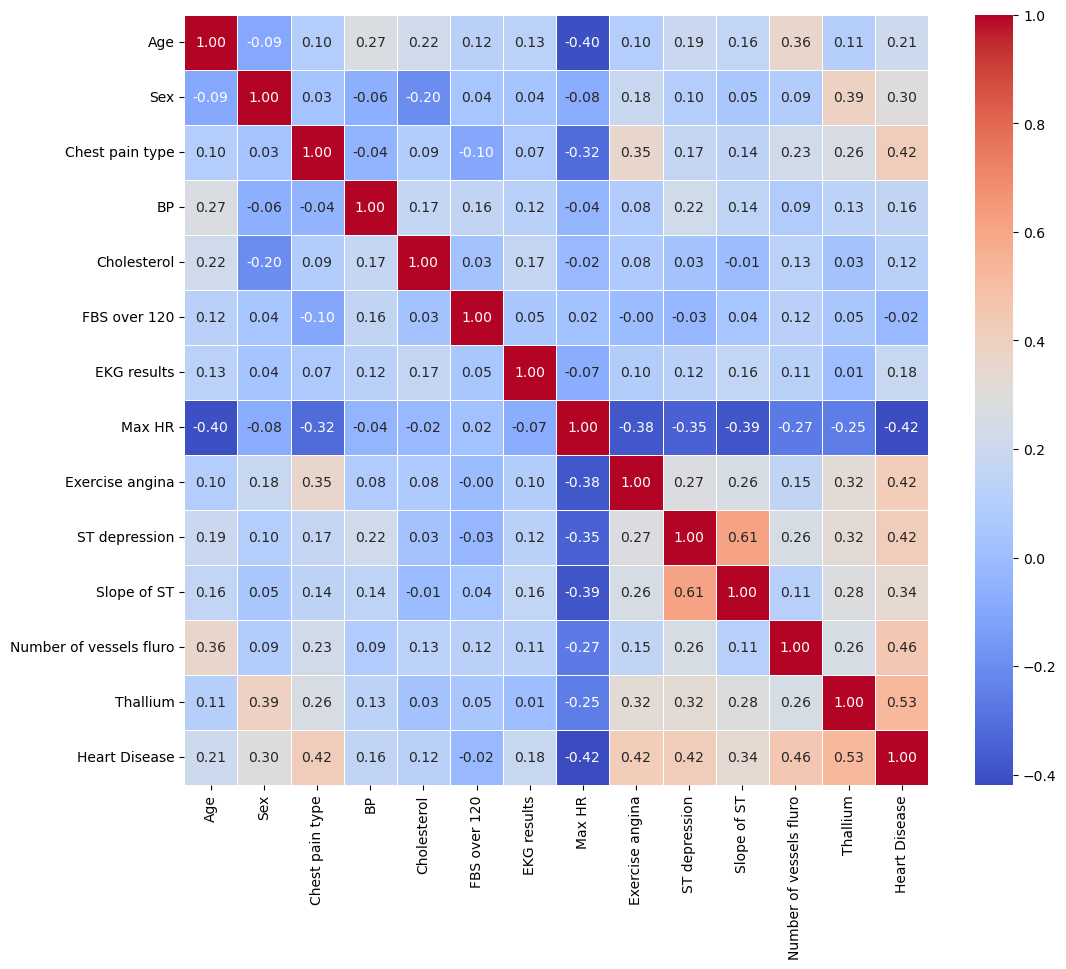

In [145]:
corr_matrix = df_normalized.corr()
plt.figure(figsize=(12, 10))
pic= sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidth=0.5)


<Axes: xlabel='Chest pain type', ylabel='count'>

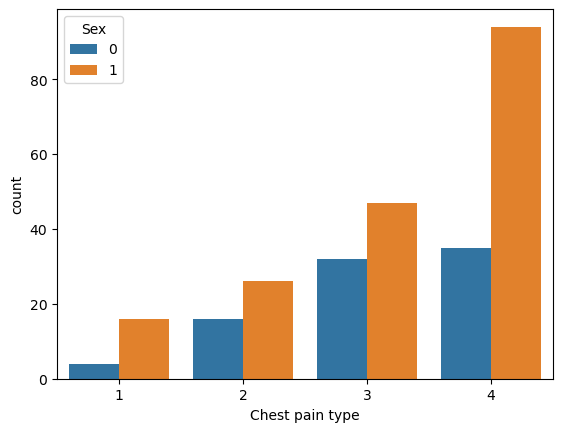

In [150]:
sns.countplot(x='Chest pain type', hue='Sex', data=df_normalized)

<Axes: xlabel='Chest pain type', ylabel='Max HR'>

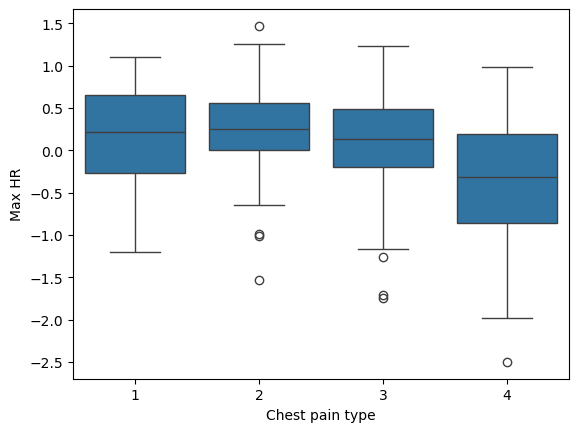

In [155]:
sns.boxplot(x='Chest pain type', y='Max HR', data=df_normalized)

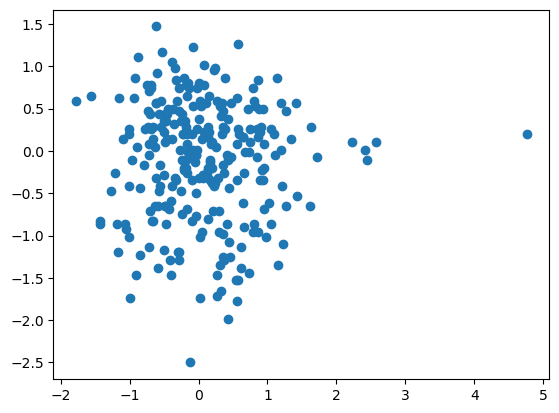

In [158]:
plt.scatter(x=df_normalized['Cholesterol'], y=df_normalized['Max HR'])


<Axes: ylabel='Frequency'>

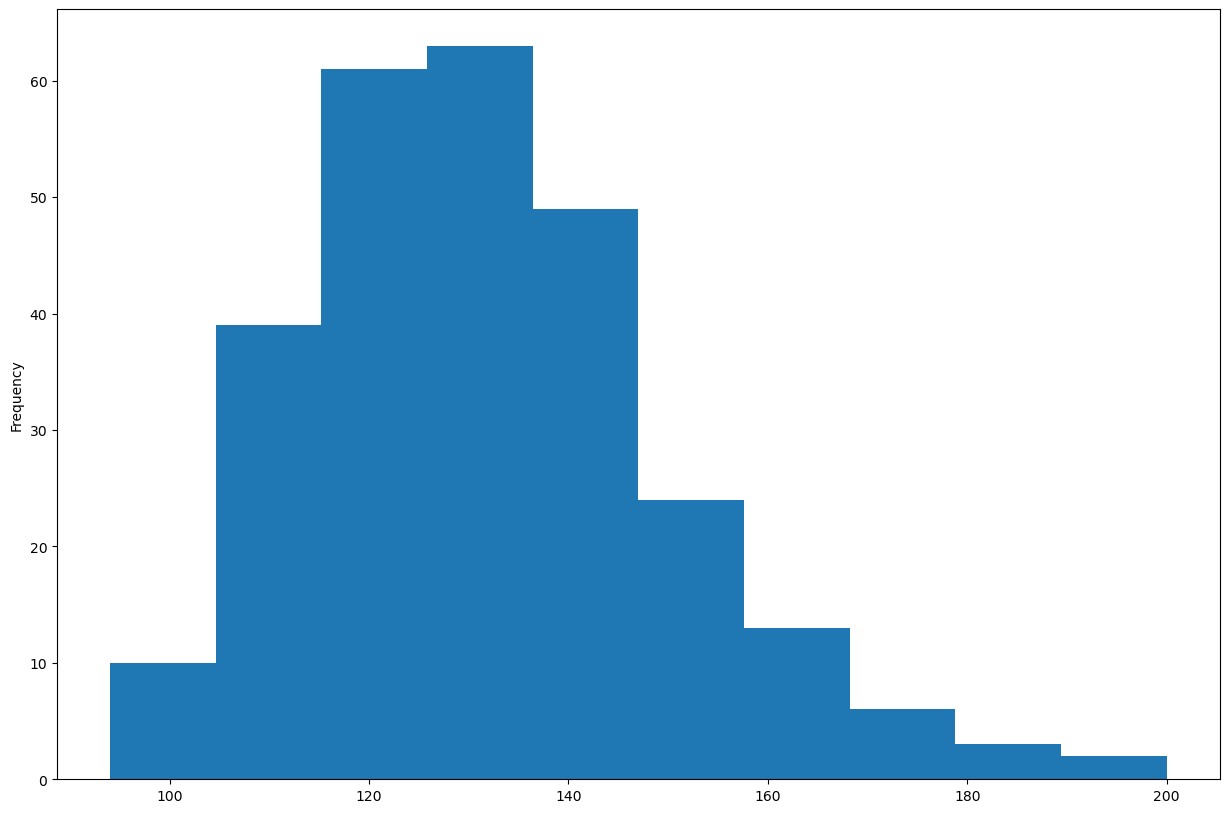

In [162]:
df['BP'].plot(kind='hist',figsize=(15,10),linewidth=0.5)